In [1]:
import pandas as pd
apple_data = pd.read_csv('AAPL.csv')
apple_data.shape

(2011, 7)

In [3]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


# Converting 'Date' column to datatime format

In [5]:
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data.set_index('Date', inplace = True)
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


# Feature Engineering

# 1. Moving Averages (MA)

In [7]:
# Short-term & long-term moving averages
apple_data["MA_7"] = apple_data["Close"].rolling(window = 7).mean()
apple_data["MA_30"] = apple_data["Close"].rolling(window = 30).mean()
apple_data["MA_50"] = apple_data["Close"].rolling(window = 50).mean()
apple_data["MA_100"] = apple_data["Close"].rolling(window = 100).mean()

apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100
Date,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,NaN,NaN
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,NaN,NaN


In [9]:
apple_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100
Date,,,,,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,279.802852,268.701334,259.6744,236.8043
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,281.105708,269.436999,260.6424,237.6068
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,282.541425,270.368667,261.7342,238.5725
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,283.882852,271.212999,262.8428,239.5005
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,285.565709,272.175665,263.9676,240.4253


# 2. Lag Features (Previous Closing Prices)

In [11]:
# Lag features - previous stock prices
apple_data["Lag_1"] = apple_data["Close"].shift(1)
apple_data["Lag_7"] = apple_data["Close"].shift(7)
apple_data["Lag_30"] = apple_data["Close"].shift(30)

apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30
Date,,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,NaN,NaN,58.747143,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,NaN,NaN,59.062859,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,NaN,NaN,59.718571,NaN,NaN
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,NaN,NaN,60.342857,NaN,NaN


# 3. Volatility Indicators

In [13]:
# Rolling standard deviation for volatility tracking
apple_data["Volatility_7"] = apple_data["Close"].rolling(window = 7).std()
apple_data["Volatility_30"] = apple_data["Close"].rolling(window = 30).std()

apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30,Volatility_7,Volatility_30
Date,,,,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,NaN,NaN,58.747143,NaN,NaN,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,NaN,NaN,59.062859,NaN,NaN,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,NaN,NaN,59.718571,NaN,NaN,NaN,NaN
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,NaN,NaN,60.342857,NaN,NaN,NaN,NaN


# 4. Daily Return Calculation

In [15]:
# Percentage change in Close price
apple_data["Daily_Return"] = apple_data["Close"].pct_change()

In [17]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30,Volatility_7,Volatility_30,Daily_Return
Date,,,,,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,NaN,NaN,58.747143,NaN,NaN,NaN,NaN,0.005374
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,NaN,NaN,59.062859,NaN,NaN,NaN,NaN,0.011102
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,NaN,NaN,59.718571,NaN,NaN,NaN,NaN,0.010454
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,NaN,NaN,60.342857,NaN,NaN,NaN,NaN,-0.001586


# Checking for Stationarity - ADF Test

In [19]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(apple_data['Close'].dropna())

print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

ADF Statistic: 1.2193701254377989
p-value: 0.9961170178032009
Critical Values: {'1%': -3.433622218212895, '5%': -2.8629854902259004, '10%': -2.5675395171404802}


In [21]:
if adf_test[1] < 0.05:
    print("Data is stationary. No need for differencing.")
else:
    print("Data is non-stationary. Apply differencing...")

Data is non-stationary. Apply differencing...


In [23]:
apple_data["Close_Diff"] = apple_data["Close"].diff().dropna()

In [25]:
adf_test_diff = adfuller(apple_data['Close_Diff'].dropna())
print("New ADF p-value:", adf_test_diff[1])

New ADF p-value: 1.7631231987211183e-25


# Plotting the Differenced Series (Close_Diff)- to Check if the trend is removed visually

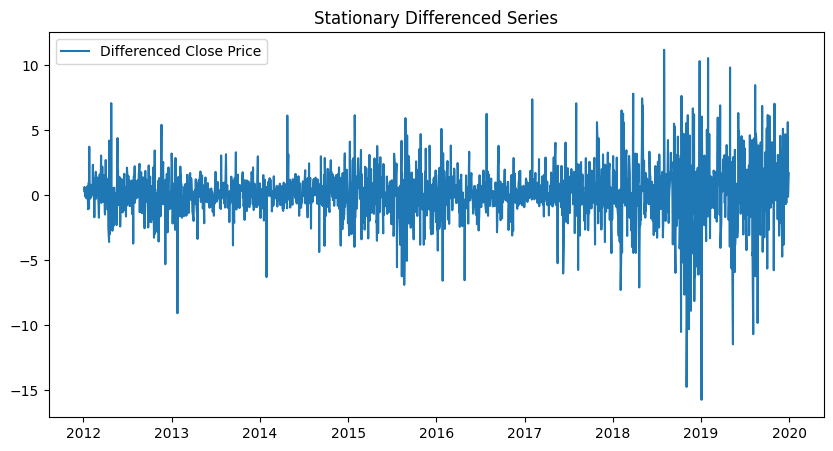

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.plot(apple_data['Close_Diff'], label = "Differenced Close Price")
plt.legend()
plt.title("Stationary Differenced Series")
plt.show()

# Determining ARIMA Parameters using ACF & PACF

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

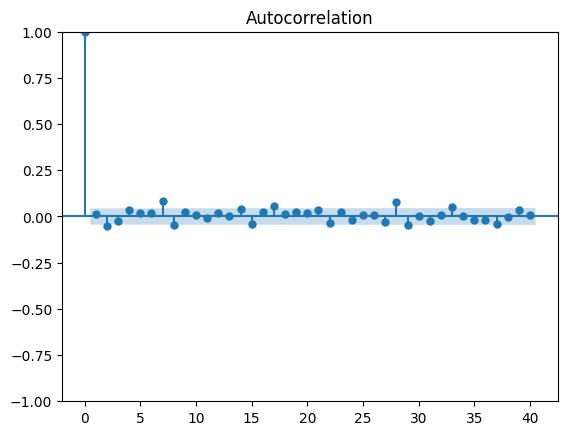

In [31]:
# Plotting ACF (To find q)
plot_acf(apple_data['Close_Diff'].dropna(), lags=40)
plt.show()

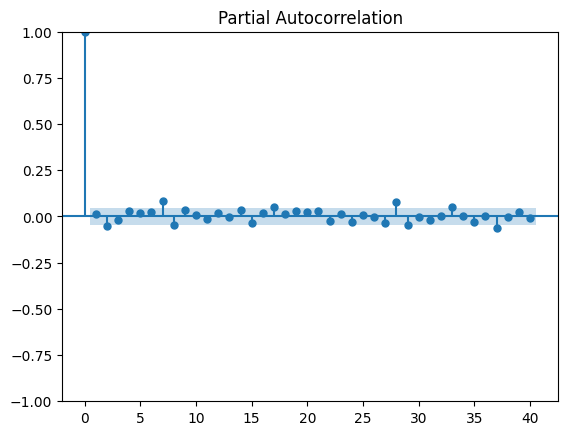

In [33]:
# Plotting PACF (To find p)
plot_pacf(apple_data['Close_Diff'].dropna(), lags=40)
plt.show()

# Train-Test Split (2012–2018 for Train, 2019 for Test)

In [35]:
apple_data.index.min()

Timestamp('2012-01-03 00:00:00')

In [37]:
apple_data.index.max()

Timestamp('2019-12-30 00:00:00')

In [39]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30,Volatility_7,Volatility_30,Daily_Return,Close_Diff
Date,,,,,,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,NaN,NaN,58.747143,NaN,NaN,NaN,NaN,0.005374,0.315716
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,NaN,NaN,59.062859,NaN,NaN,NaN,NaN,0.011102,0.655712
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,NaN,NaN,59.718571,NaN,NaN,NaN,NaN,0.010454,0.624286
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,NaN,NaN,60.342857,NaN,NaN,NaN,NaN,-0.001586,-0.095714


In [43]:
from sklearn.model_selection import train_test_split

In [45]:
train_data = apple_data[apple_data.index < "2019-01-01"]
train_data.shape

(1760, 17)

In [47]:
test_data = apple_data[apple_data.index >= "2019-01-01"]
test_data.shape

(251, 17)

# Model Building - Time Series Models

In [110]:
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Conv1D, Flatten, Dropout
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

In [ ]:
#pip install fbprophet

In [52]:
# Defining evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'\n{model_name} Performance:')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')

    plt.figure(figsize=(10,5))
    plt.plot(y_true.index, y_true, label='Actual Prices', color='blue')
    plt.plot(y_true.index, y_pred, label='Predicted Prices', color='red')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    return {'Model': model_name, 'MAE': mae, 'RMSE': rmse}


In [54]:
# Initializing results storage

model_results = []

# 1. ARIMA Model

C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U


ARIMA Performance:
MAE: 50.5842
RMSE: 60.3653


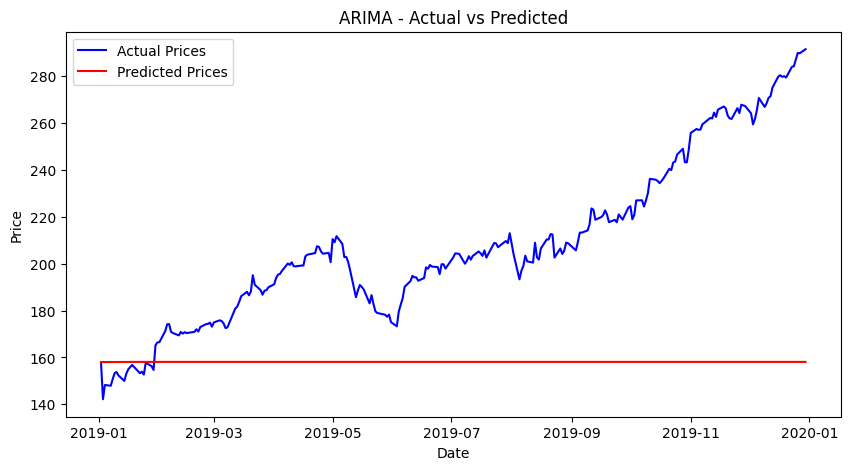

In [61]:
arima_model = ARIMA(train_data['Close'], order=(5,1,0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test_data))
model_results.append(evaluate_model(test_data['Close'], arima_pred, 'ARIMA'))

# 2. SARIMA Model

C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict


SARIMA Performance:
MAE: 43.9406
RMSE: 52.7451


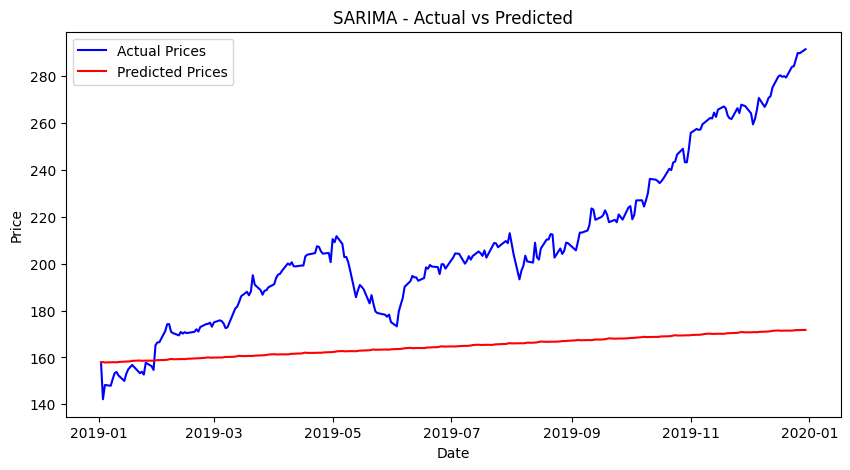

In [64]:
sarima_model = SARIMAX(train_data['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()
sarima_pred = sarima_fit.forecast(steps=len(test_data))
model_results.append(evaluate_model(test_data['Close'], sarima_pred, 'SARIMA'))

# 3. Exponential Smoothing Model

C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Exponential Smoothing Performance:
MAE: 43.8850
RMSE: 52.6922


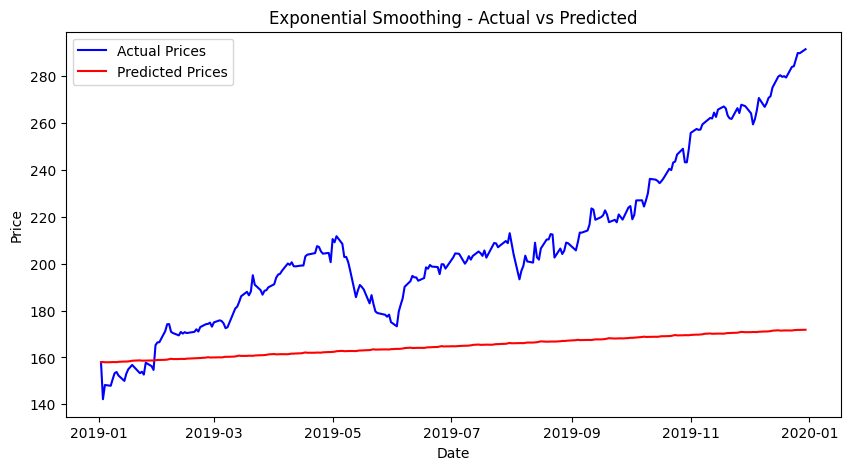

In [67]:
exp_smooth_model = ExponentialSmoothing(train_data['Close'], trend='add', seasonal='add', seasonal_periods=12)
exp_smooth_fit = exp_smooth_model.fit()
exp_smooth_pred = exp_smooth_fit.forecast(steps=len(test_data))
model_results.append(evaluate_model(test_data['Close'], exp_smooth_pred, 'Exponential Smoothing'))

# Machine Learning Models for Time Series

# 4. Random Forest Regressor


Random Forest Performance:
MAE: 51.3536
RMSE: 61.1047


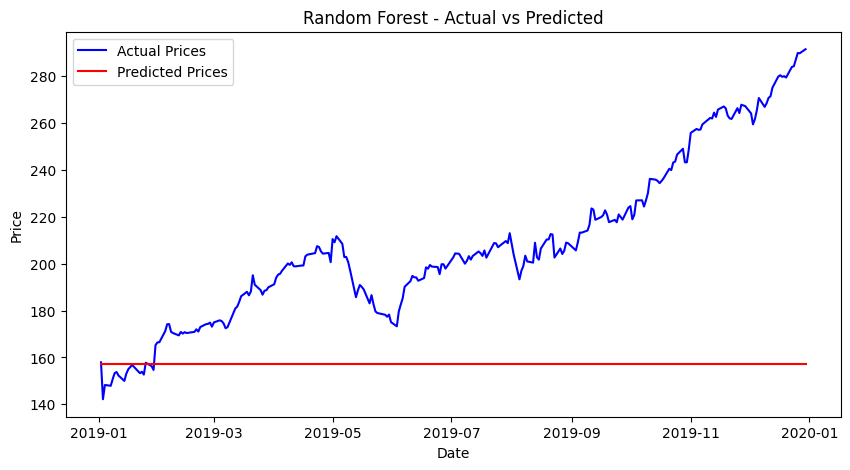

In [73]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(np.arange(len(train_data)).reshape(-1,1), train_data['Close'])
rf_pred = rf_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1,1))
model_results.append(evaluate_model(test_data['Close'], rf_pred, 'Random Forest'))

# 5. SVR Model


SVR Performance:
MAE: 36.4489
RMSE: 48.2078


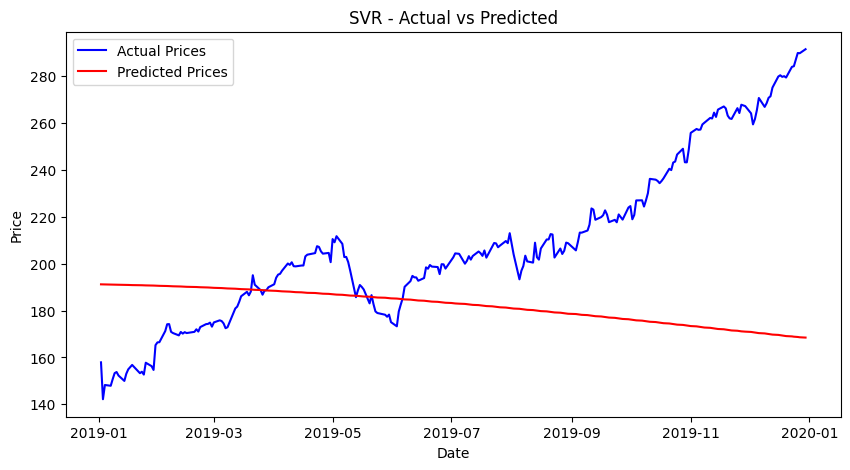

In [76]:
svr_model = SVR(kernel='rbf')
svr_model.fit(np.arange(len(train_data)).reshape(-1,1), train_data['Close'])
svr_pred = svr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1,1))
model_results.append(evaluate_model(test_data['Close'], svr_pred, 'SVR'))

# 6. XGBoost Model


XGBoost Performance:
MAE: 53.0062
RMSE: 62.6766


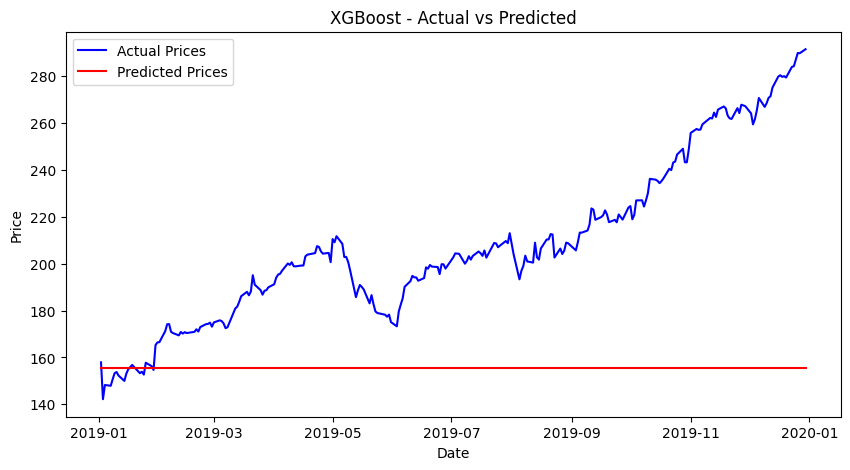

In [79]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(np.arange(len(train_data)).reshape(-1,1), train_data['Close'])
xgb_pred = xgb_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1,1))
model_results.append(evaluate_model(test_data['Close'], xgb_pred, 'XGBoost'))

# Deep Learning Models

# 7. LSTM Model

In [85]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Close']])
test_scaled = scaler.transform(test_data[['Close']])
X_train, y_train = train_scaled[:-1], train_scaled[1:]
X_test, y_test = test_scaled[:-1], test_scaled[1:]
X_train = X_train.reshape(-1, 1, 1)
X_test = X_test.reshape(-1, 1, 1)

C:\Users\mulag\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step

LSTM Performance:
MAE: 13.5154
RMSE: 21.1621


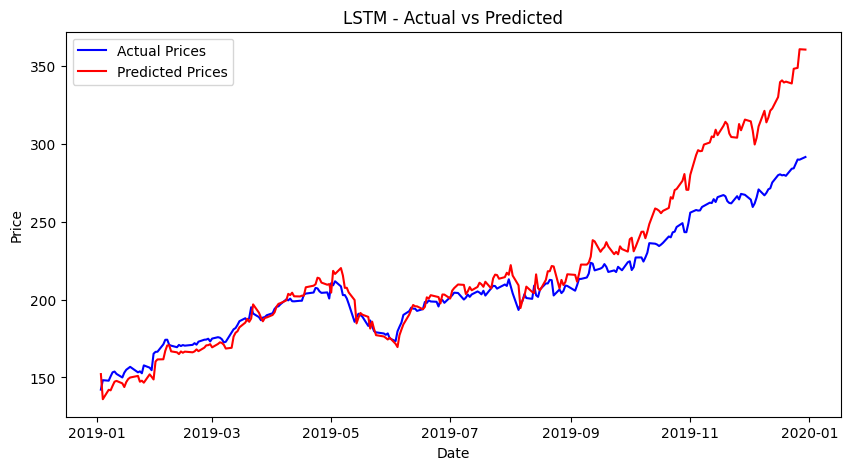

In [91]:
lstm_model = Sequential([LSTM(50, activation='relu', return_sequences=True, input_shape=(1,1)), LSTM(50, activation='relu'), Dense(1)])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=10, verbose=0)
lstm_pred = scaler.inverse_transform(lstm_model.predict(X_test))
model_results.append(evaluate_model(test_data['Close'][1:], lstm_pred.flatten(), 'LSTM'))

# 8. GRU Model

C:\Users\mulag\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step

GRU Performance:
MAE: 3.7548
RMSE: 5.2294


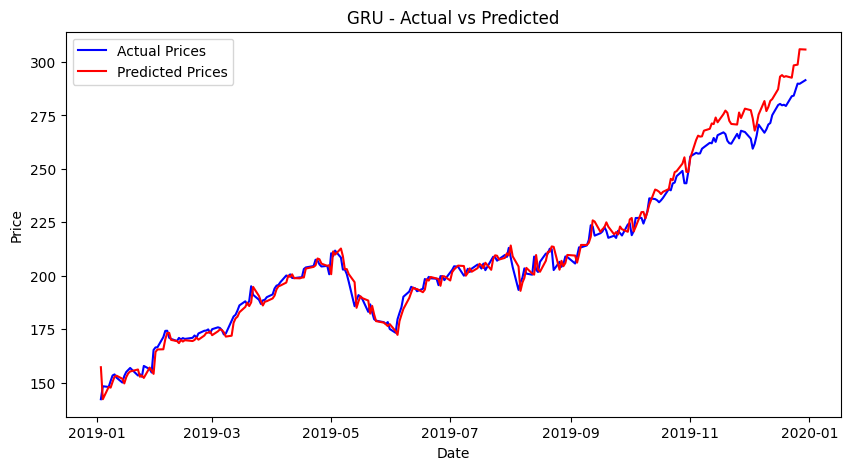

In [94]:
gru_model = Sequential([GRU(50, activation='relu', return_sequences=True, input_shape=(1,1)), GRU(50, activation='relu'), Dense(1)])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=10, verbose=0)
gru_pred = scaler.inverse_transform(gru_model.predict(X_test))
model_results.append(evaluate_model(test_data['Close'][1:], gru_pred.flatten(), 'GRU'))

# 9. CNN 1D Model

C:\Users\mulag\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

CNN 1D Performance:
MAE: 4.2206
RMSE: 5.1474


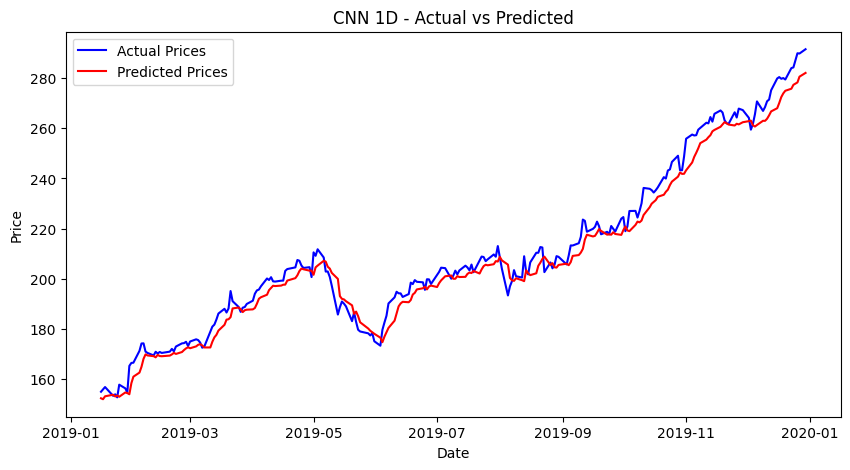

In [101]:
lookback = 10

X_train, y_train = [], []
for i in range(lookback, len(train_scaled)):
    X_train.append(train_scaled[i-lookback:i])
    y_train.append(train_scaled[i])

X_test, y_test = [], []
for i in range(lookback, len(test_scaled)):
    X_test.append(test_scaled[i-lookback:i])
    y_test.append(test_scaled[i])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

# CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(lookback, 1)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.fit(X_train, y_train, epochs=10, verbose=0)

cnn_pred = scaler.inverse_transform(cnn_model.predict(X_test))
model_results.append(evaluate_model(test_data['Close'][lookback:], cnn_pred.flatten(), 'CNN 1D'))

In [103]:
results_df = pd.DataFrame(model_results)
print(results_df.sort_values(by='RMSE'))

                   Model        MAE       RMSE
8                 CNN 1D   4.220591   5.147438
7                    GRU   3.754770   5.229444
6                   LSTM  13.515398  21.162119
4                    SVR  36.448878  48.207782
2  Exponential Smoothing  43.884971  52.692201
1                 SARIMA  43.940589  52.745059
0                  ARIMA  50.584189  60.365302
3          Random Forest  51.353630  61.104662
5                XGBoost  53.006164  62.676605


In [105]:
results_df

,Model,MAE,RMSE
0,ARIMA,50.584189,60.365302
1,SARIMA,43.940589,52.745059
2,Exponential Smoothing,43.884971,52.692201
3,Random Forest,51.353630,61.104662
4,SVR,36.448878,48.207782
5,XGBoost,53.006164,62.676605
6,LSTM,13.515398,21.162119
7,GRU,3.754770,5.229444
8,CNN 1D,4.220591,5.147438


# Forecast next 30 days

In [130]:
# Ensuring predictions remain within the valid range

future_days = 30
last_value = test_scaled[-1].reshape(1,1,1)
predictions = []
dates = [apple_data.index[-1] + timedelta(days=i) for i in range(1, future_days + 1)]

In [132]:
for _ in range(future_days):
    predicted_value = gru_model.predict(last_value)  
    predictions.append(predicted_value[0][0]) 
    last_value = np.array(predicted_value).reshape(1,1,1)  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [134]:
# Converting predictions back to original scale
future_prices = scaler.inverse_transform(np.array(predictions).reshape(-1,1))

In [136]:
# Ensuring predictions are realistic
future_prices = np.clip(future_prices, apple_data['Close'].min(), apple_data['Close'].max())

In [138]:
# Create DataFrame for visualization
forecast_df = pd.DataFrame({'Date': dates, 'Predicted_Close': future_prices.flatten()})
forecast_df.set_index('Date', inplace=True)

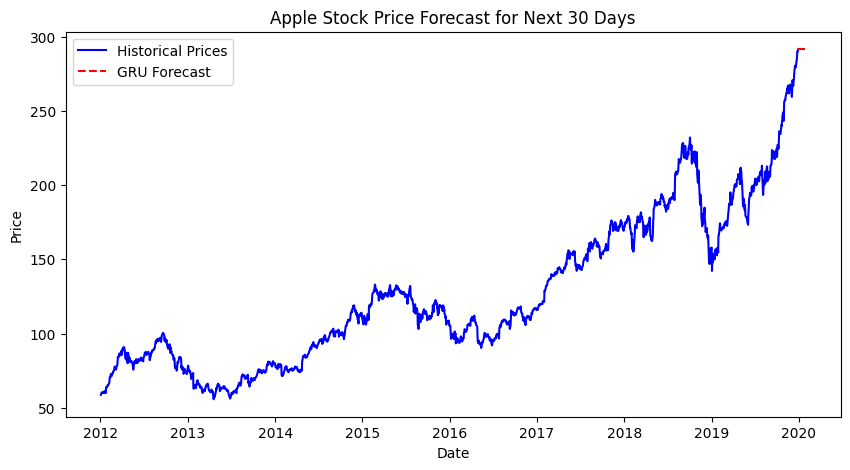

In [151]:
# Plot corrected future predictions
plt.figure(figsize=(10,5))
plt.plot(apple_data.index, apple_data['Close'], label='Historical Prices', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted_Close'], label='GRU Forecast', color='red', linestyle='dashed')
plt.title('Apple Stock Price Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [153]:
# Display forecasted values
print(forecast_df)

            Predicted_Close
Date                       
2019-12-31       291.519989
2020-01-01       291.519989
2020-01-02       291.519989
2020-01-03       291.519989
2020-01-04       291.519989
2020-01-05       291.519989
2020-01-06       291.519989
2020-01-07       291.519989
2020-01-08       291.519989
2020-01-09       291.519989
2020-01-10       291.519989
2020-01-11       291.519989
2020-01-12       291.519989
2020-01-13       291.519989
2020-01-14       291.519989
2020-01-15       291.519989
2020-01-16       291.519989
2020-01-17       291.519989
2020-01-18       291.519989
2020-01-19       291.519989
2020-01-20       291.519989
2020-01-21       291.519989
2020-01-22       291.519989
2020-01-23       291.519989
2020-01-24       291.519989
2020-01-25       291.519989
2020-01-26       291.519989
2020-01-27       291.519989
2020-01-28       291.519989
2020-01-29       291.519989


# Saving our GRU Model for Deployment

In [155]:
gru_model.save('gru_model.h5')  # Save the entire model